 # It would be fantastic if you could include a summary of the column Dtypes, data value nonnull counts, relevant and irrelevant columns, along with anything else code related you think is worth showing in the notebook

In [194]:
import pandas as pd
import numpy as np

import plotly.express as px

pd.set_option('display.max_columns', 200)

| Column name             | Description                                                                                   |
|------------------------|-----------------------------------------------------------------------------------------------|
| ID                     | Trip identification number                                                                    |
| VendorID               | A code indicating the TPEP provider that provided the record.  1= Creative Mobile Technologies, LLC; 2= VeriFone Inc. |
| tpep_pickup_datetime   | The date and time when the meter was engaged.                                                 |
| tpep_dropoff_datetime  | The date and time when the meter was disengaged.                                              |
| Passenger_count        | The number of passengers in the vehicle.  This is a driver-entered value.                     |
| Trip_distance          | The elapsed trip distance in miles reported by the taximeter.                                 |
| PULocationID           | TLC Taxi Zone in which the taximeter was engaged.                                             |
| DOLocationID           | TLC Taxi Zone in which the taximeter was disengaged.                                          |
| RateCodeID             | The final rate code in effect at the end of the trip. 1= Standard rate, 2= JFK, 3= Newark, 4= Nassau or Westchester, 5= Negotiated fare, 6= Group ride |
| Store_and_fwd_flag     | This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. Y= store and forward trip, N= not a store and forward trip |
| Payment_type           | A numeric code signifying how the passenger paid for the trip.  1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip |
| Fare_amount            | The time-and-distance fare calculated by the meter.                                           |
| Extra                  | Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges. |
| MTA_tax                | $0.50 MTA tax that is automatically triggered based on the metered rate in use.             |
| Improvement_surcharge  | $0.30 improvement surcharge assessed trips at the flag drop. The  improvement surcharge began being levied in 2015. |
| Tip_amount             | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount           | Total amount of all tolls paid in trip.                                                       |
| Total_amount           | The total amount charged to passengers. Does not include cash tips.                          |


In [195]:
csv = pd.read_csv(r"../notebook/2017_Yellow_Taxi_Trip_Data.csv")

In [196]:
csv.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [197]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [198]:
csv[['total_amount','trip_distance']].describe()

,total_amount,trip_distance
count,22699.000000,22699.000000
mean,16.310502,2.913313
std,16.097295,3.653171
min,-120.300000,0.000000
25%,8.750000,0.990000
50%,11.800000,1.610000
75%,17.800000,3.060000
max,1200.290000,33.960000


In [199]:
# show columns with object type
csv.select_dtypes(include=['object']).head()

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,N
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,N
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,N
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,N
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,N


In [200]:
df=csv.copy()

In [201]:
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [202]:
# Sort the data by total amount and print the top 20 values
df.sort_values(by='total_amount', ascending=False).head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


In [203]:
# 1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip to dict
payment_type_dict = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'}
# add new column payment_type_name
df['payment_type_name'] = df['payment_type'].map(payment_type_dict)

In [204]:
# How many of each payment type are represented in the data?
df['payment_type_name'].value_counts()

Credit card    15265
Cash            7267
No charge        121
Dispute           46
Name: payment_type_name, dtype: int64

In [205]:
# What is the average tip for trips paid for with credit card?
print(df[df.payment_type_name == 'Credit card']['tip_amount'].mean())
# What is the average tip for trips paid for with cash?
print(df[df.payment_type_name == 'Cash']['tip_amount'].mean())

2.7298001965280054
0.0


In [206]:
#==> ENTER YOUR CODE HERE

# How many times is each vendor ID represented in the data?
df['VendorID'].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

In [207]:
#==> ENTER YOUR CODE HERE

# What is the mean total amount for each vendor?
df.groupby('VendorID')['total_amount'].mean()

VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

In [208]:
#==> ENTER YOUR CODE HERE

# Filter the data for credit card payments only
print(df[df.payment_type_name == 'Credit card']['total_amount'].mean())
# Filter the data for credit card payments only
print(df[df.payment_type_name == 'Cash']['total_amount'].mean())

17.663577464788734
13.545820833906705


In [209]:
# Calculate the average tip amount for each passenger count (credit card payments only)
df[df.payment_type_name == 'Credit card'].groupby('passenger_count')['tip_amount'].mean()

passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64

 ### Trip distance and total ammount

 - verify oddities in the two columns

In [210]:
# sort trip_distance column in descending order
df[['trip_distance', 'total_amount']].sort_values(by='trip_distance', ascending=False).head()

,trip_distance,total_amount
9280,33.96,150.30
13861,33.92,258.21
6064,32.72,179.06
10291,31.95,131.80
29,30.83,111.38


In [211]:
# plot trip_distance and total_amount (plotly scatter plot w/ trendine)
fig = px.scatter(df, x="trip_distance", y="total_amount", trendline="ols")
fig.show()

- There seems to be a positive correlation to the trip distance and 

In [212]:
df.trip_distance.corr(df.total_amount)

0.7671815814347734

In [213]:
df.trip_distance.sort_values(ascending=False)

9280     33.96
13861    33.92
6064     32.72
10291    31.95
29       30.83
         ...  
2440      0.00
15916     0.00
1350      0.00
246       0.00
17788     0.00
Name: trip_distance, Length: 22699, dtype: float64

In [214]:
# show trip_distance = 0 trip_distance column
df[df.trip_distance <= 0]['trip_distance'].count()

148

In [215]:
df[df.trip_distance <= 0]['trip_distance'].count() / df.shape[0] * 100

0.6520111018106525

In [216]:
# find the overlapping of total_amount <= 0 and trip_distance = 0
df[(df.total_amount == 0) & (df.trip_distance == 0)][['total_amount', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type_name']]

,total_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,payment_type_name
5722,0.0,0.0,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Credit card
10506,0.0,0.0,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Credit card
22566,0.0,0.0,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit card


- roughly 0.65% of the trips have a 0 distance
- 3 of these instances also had a total ammount of 0 so it is assumed this is either a canceled trip or an error in the data.
- judging by the pickup and dropoff times these trips may been either changed or canceled

In [217]:
df.total_amount.sort_values().head(20)

12944   -120.30
20698     -5.80
17602     -5.80
11204     -5.30
14714     -5.30
8204      -4.80
20317     -4.80
10281     -4.30
5448      -4.30
4423      -4.30
18565     -3.80
314       -3.80
5758      -3.80
1646      -3.30
10506      0.00
4402       0.00
5722       0.00
22566      0.00
19067      0.30
14283      0.31
Name: total_amount, dtype: float64

- looking at the total charges it seems 18 are at or below zero. 3 of which we have already written off as changed or canceled

In [218]:
df[df.total_amount <= 0][['total_amount', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type_name']]

,total_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,payment_type_name
314,-3.8,0.12,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,No charge
1646,-3.3,0.04,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,No charge
4402,0.0,7.06,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash
4423,-4.3,0.06,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Dispute
5448,-4.3,0.25,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,No charge
5722,0.0,0.00,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Credit card
5758,-3.8,0.02,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,No charge
8204,-4.8,0.41,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,No charge
10281,-4.3,0.00,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Dispute
10506,0.0,0.00,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Credit card


In [219]:
df[df.total_amount == 0][['total_amount', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type_name']]

,total_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,payment_type_name
4402,0.0,7.06,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash
5722,0.0,0.00,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Credit card
10506,0.0,0.00,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Credit card
22566,0.0,0.00,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit card


- of the 4 no charge scenarios 1 has been given in cash for a 7 mile trip and could have been an error. The other 3 are accounted for. 

In [220]:
# show the rows with total_amount <= 0 and trip_distance = 0, just show the columns of total_amount and trip_distance
df[(df.total_amount <= 0) & (df.trip_distance == 0)][['total_amount', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type_name']]

,total_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,payment_type_name
5722,0.0,0.0,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Credit card
10281,-4.3,0.0,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Dispute
10506,0.0,0.0,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Credit card
22566,0.0,0.0,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit card


- one of the 0 trip distances ended in a dispute which cost the company $4.30

In [221]:
df[df.total_amount < 0][['total_amount', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type_name']]

,total_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,payment_type_name
314,-3.8,0.12,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,No charge
1646,-3.3,0.04,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,No charge
4423,-4.3,0.06,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Dispute
5448,-4.3,0.25,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,No charge
5758,-3.8,0.02,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,No charge
8204,-4.8,0.41,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,No charge
10281,-4.3,0.00,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Dispute
11204,-5.3,0.64,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,No charge
12944,-120.3,0.17,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Dispute
14714,-5.3,0.40,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Dispute


In [222]:
df[df.total_amount < 0]['payment_type_name'].value_counts()

No charge    7
Dispute      7
Name: payment_type_name, dtype: int64

In [223]:
df['payment_type_name'].value_counts()

Credit card    15265
Cash            7267
No charge        121
Dispute           46
Name: payment_type_name, dtype: int64

- 7 of the negative charges were through disputes

In [224]:
df[(df.payment_type_name == 'No charge') & (df.total_amount < 0)][['total_amount', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type_name']]

,total_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,payment_type_name
314,-3.8,0.12,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,No charge
1646,-3.3,0.04,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,No charge
5448,-4.3,0.25,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,No charge
5758,-3.8,0.02,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,No charge
8204,-4.8,0.41,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,No charge
11204,-5.3,0.64,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,No charge
18565,-3.8,0.10,05/22/2017 3:51:20 PM,05/22/2017 3:52:22 PM,No charge


- 7 of the negative charges were through no charge scenarios, this would require further study to get to the bottom of

In [225]:
df_total_trip = df[['total_amount', 'trip_distance']]

In [226]:
df_total_trip.describe()

,total_amount,trip_distance
count,22699.000000,22699.000000
mean,16.310502,2.913313
std,16.097295,3.653171
min,-120.300000,0.000000
25%,8.750000,0.990000
50%,11.800000,1.610000
75%,17.800000,3.060000
max,1200.290000,33.960000


<Axes: >

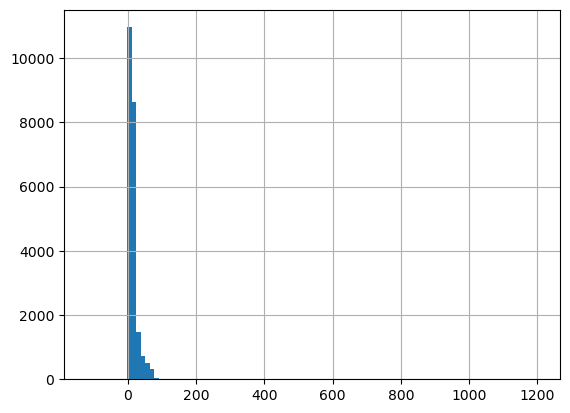

In [227]:
# histogram of total_amount 100 bins
df_total_trip.total_amount.hist(bins=100)

/Users/christianl/opt/anaconda3/envs/data_analysis/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log1p



<Axes: >

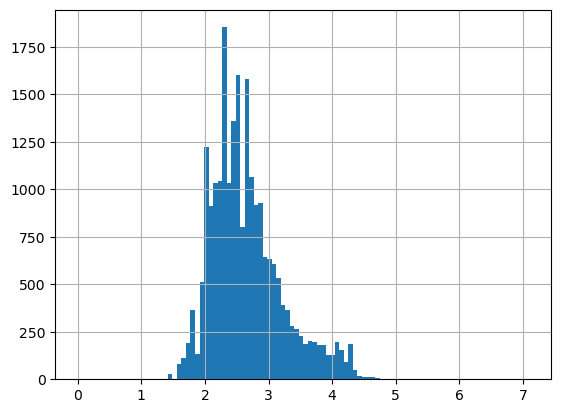

In [228]:
# np.log1p(x) = log(1+x)
# histogram of log1p(total_amount) 100 bins
np.log1p(df_total_trip.total_amount).hist(bins=100)
# why log1p? because there are some 0 values in total_amount

<Axes: >

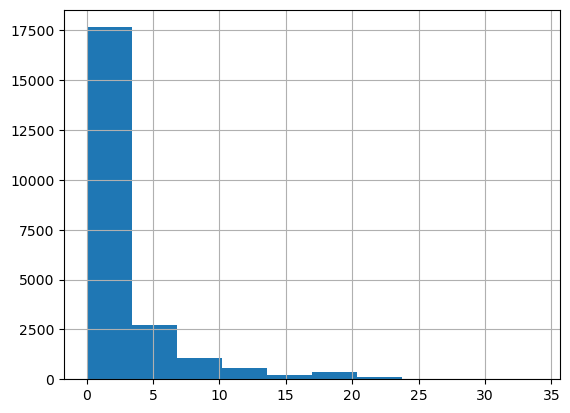

In [229]:
df_total_trip.trip_distance.hist()

<Axes: >

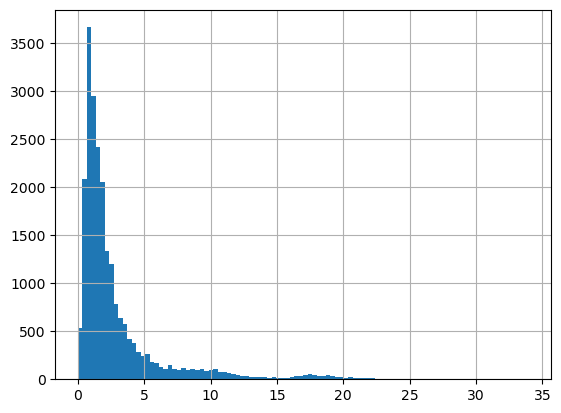

In [230]:
df_total_trip.trip_distance.hist(bins=100)

<Axes: >

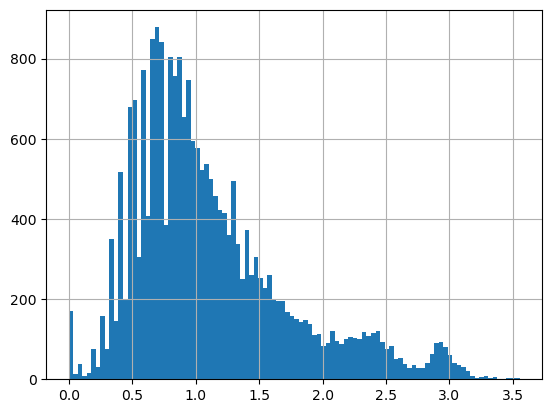

In [231]:
# np.log1p(x) = log(1+x)
# histogram of log1p(trip_distance) 100 bins
np.log1p(df_total_trip.trip_distance).hist(bins=100)

In [232]:
import plotly.express as px

In [233]:
# bell curve of total_amount
px.histogram(df_total_trip, x='total_amount', nbins=100, marginal='violin')

In [234]:
# distribution of total_amount
px.histogram(df_total_trip, x='trip_distance', nbins=100, marginal='box')